# Analisis Exploratorio de Datos

En este Análisis Exploratorio de Datos vamos a tomar un enfoque en estadísticas y visulalizacion de los datos para resumir, visualizar y comprender los datos antes de aplicar técnicas de modelado o inferencia más avanzadas. Este EDA implica la inspeccion de los datos registrados en cada dataset y su conmposicion, asi como la generación de estadísticas descriptivas, gráficos y visualizaciones para identificar patrones, relaciones y posibles valores atípicos en los datos. Es una fase esencial en el proceso de análisis de datos y nos ayudara a obtener una comprensión de como estan conformados los datasets con los que están trabajando.

Se nos ha entregado un archivo csv, entonces inspeccionamos su composicion

In [1]:
import pandas as pd
import numpy as np

# Especifica la ruta completa del archivo Excel, incluyendo la carpeta
archivo_csv = "Data\AccidentesAviones.csv"

# Lee todas las hojas del archivo Excel en un diccionario de DataFrames
dataframes = pd.read_csv(archivo_csv)

dataframes.keys()

Index(['Unnamed: 0', 'fecha', 'HORA declarada', 'Ruta', 'OperadOR',
       'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard',
       'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos',
       'passenger_fatalities', 'crew_fatalities', 'ground', 'summary'],
      dtype='object')

Vemos que el archivo de csv contiene 18 columnas, inicialmente usamos todo el archivo para este EDA y mas adelante deteminamos si es necesario eliminar alguna columna.

En el momento en el que empezamos a realizar el EDA todavia no conocemos los datos pero debemos tener siempre presente cual es nuestro objetivo final, que es lo deseamos obtener al final del proyecto y asi a medida que vamos explorando los datos vamos  encontrando el camino que finalmente nos llevara hasta nuestro objetivo y no estaremos divagando sin sentido en el inmenso mar de datos que a veces pueden ser nuestros datos. 

Vamos a cargar los datos y le asignamos el nombre de "df_accidentes". Este sera el dataframe con el que trabajaremos de aqui en adelante.

In [2]:
# Se lee el df
df_accidentes = dataframes
print(df_accidentes)

      Unnamed: 0               fecha HORA declarada  \
0              0  September 17, 1908           1718   
1              1  September 07, 1909              ?   
2              2       July 12, 1912           0630   
3              3     August 06, 1913              ?   
4              4  September 09, 1913           1830   
...          ...                 ...            ...   
5003        5003      March 28, 2021           1835   
5004        5004        May 21, 2021           1800   
5005        5005       June 10, 2021           0800   
5006        5006       July 04, 2021          11:30   
5007        5007       July 06, 2021           1500   

                                    Ruta                         OperadOR  \
0                    Fort Myer, Virginia             Military - U.S. Army   
1                Juvisy-sur-Orge, France                                ?   
2              Atlantic City, New Jersey             Military - U.S. Navy   
3     Victoria, British Columbi

In [3]:
df_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

# Renombrar Columnas

Lo primero que encontramos es que los dos dataframe contienen una columna que los relaciona pero tiene diferente nombre una se llama 'ID_hecho' y la otra se llama 'ID'. En los dos dataframes esta columna es la que contiene el identificador unico del siniestro y para poder relacionarlas debemos asignarles el mismo nombre por lo que en el dataframe df_hechos le cambiamos el nombre 'ID' por 'ID_hecho'

# Composicion de las columnas 

Ahora vamos a revisar en el dataframe como es la composicion de estas columnas, que tipos de datos tiene cada columna y cuantos de cada tipo.

In [4]:

# Crea un diccionario para almacenar los resultados
data_types_counts = {}

# Itera a través de las columnas del DataFrame
for columna in df_accidentes.columns:
    # Calcula la ocurrencia de cada tipo de dato en la columna actual
    data_type_counts = df_accidentes[columna].apply(type).value_counts()
    
    # Almacena los resultados en el diccionario usando el nombre de la columna como clave
    data_types_counts[columna] = data_type_counts

# Imprime los resultados
for columna, counts in data_types_counts.items():
    print(f"Columna: {columna}")
    print(counts)
    print()

Columna: Unnamed: 0
Unnamed: 0
<class 'int'>    5008
Name: count, dtype: int64

Columna: fecha
fecha
<class 'str'>    5008
Name: count, dtype: int64

Columna: HORA declarada
HORA declarada
<class 'str'>    5008
Name: count, dtype: int64

Columna: Ruta
Ruta
<class 'str'>    5008
Name: count, dtype: int64

Columna: OperadOR
OperadOR
<class 'str'>    5008
Name: count, dtype: int64

Columna: flight_no
flight_no
<class 'str'>    5008
Name: count, dtype: int64

Columna: route
route
<class 'str'>      5007
<class 'float'>       1
Name: count, dtype: int64

Columna: ac_type
ac_type
<class 'str'>    5008
Name: count, dtype: int64

Columna: registration
registration
<class 'str'>    5008
Name: count, dtype: int64

Columna: cn_ln
cn_ln
<class 'str'>    5008
Name: count, dtype: int64

Columna: all_aboard
all_aboard
<class 'str'>    5008
Name: count, dtype: int64

Columna: PASAJEROS A BORDO
PASAJEROS A BORDO
<class 'str'>    5008
Name: count, dtype: int64

Columna: crew_aboard
crew_aboard
<class 's

# Registros Duplicados

Verificamos la cantidad de valores unicos en cada columna. Esto nos aclarara un poco mas la composicion de cada una y la calidad de los datos registrados alli.

In [5]:
# Crear un diccionario para almacenar los resultados
unique_counts = {}

# Iterar a través de las columnas del DataFrame
for columna in df_accidentes.columns:
    # Calcular la cantidad de valores únicos en la columna actual
    unique_count = df_accidentes[columna].nunique()
    
    # Almacenar el resultado en el diccionario usando el nombre de la columna como clave
    unique_counts[columna] = unique_count

# Imprimir los resultados
for columna, count in unique_counts.items():
    print(f"Cantidad de valores únicos en la columna '{columna}': {count}")

Cantidad de valores únicos en la columna 'Unnamed: 0': 5008
Cantidad de valores únicos en la columna 'fecha': 4577
Cantidad de valores únicos en la columna 'HORA declarada': 1217
Cantidad de valores únicos en la columna 'Ruta': 4125
Cantidad de valores únicos en la columna 'OperadOR': 2268
Cantidad de valores únicos en la columna 'flight_no': 893
Cantidad de valores únicos en la columna 'route': 3838
Cantidad de valores únicos en la columna 'ac_type': 2469
Cantidad de valores únicos en la columna 'registration': 4701
Cantidad de valores únicos en la columna 'cn_ln': 3908
Cantidad de valores únicos en la columna 'all_aboard': 245
Cantidad de valores únicos en la columna 'PASAJEROS A BORDO': 235
Cantidad de valores únicos en la columna 'crew_aboard': 35
Cantidad de valores únicos en la columna 'cantidad de fallecidos': 200
Cantidad de valores únicos en la columna 'passenger_fatalities': 191
Cantidad de valores únicos en la columna 'crew_fatalities': 29
Cantidad de valores únicos en la co

Aunque los dos resultados anterioes se complementan con otros mas que haremos a continuacion, ya podemos ver algunos aspectos interesantes acerca de nuestros datos por ejemplo: El dataframe df_accidentes contiene 5008 registros y vemos que la contidad de valores unicos en la columna 'registration' es de 4701 lo que nos indica que podriamos utilizar esta columna como identificador de los accidentes pero esto tambien nos indica que hay accidentes registrados dos veces o registros duplicados en la columna registration. 

Para poder utilizar la columna registration como identificador unico de cada registro vamos a eliminar los registros duplicados en la columna registration pues esto no afectara demasiado los conjunto de datos ya que el numero de registros repetidos en muy bajo comparado en el total de registros.

In [6]:
# Elimina los registros duplicados en la columna "registration" y conserva solo el primero
df_sin_duplicados = df_accidentes.drop_duplicates(subset='registration', keep='first')

# Imprime el DataFrame resultante
print(df_sin_duplicados)

      Unnamed: 0               fecha HORA declarada  \
0              0  September 17, 1908           1718   
1              1  September 07, 1909              ?   
17            17       June 17, 1917              ?   
23            23   December 16, 1918              ?   
24            24        May 25, 1919              ?   
...          ...                 ...            ...   
5003        5003      March 28, 2021           1835   
5004        5004        May 21, 2021           1800   
5005        5005       June 10, 2021           0800   
5006        5006       July 04, 2021          11:30   
5007        5007       July 06, 2021           1500   

                            Ruta                         OperadOR flight_no  \
0            Fort Myer, Virginia             Military - U.S. Army         ?   
1        Juvisy-sur-Orge, France                                ?         ?   
17        Near Yarmouth, England                                ?         ?   
23         Elizabeth, N

# Valores Faltantes o Valores en Blanco

Inspeccionamos la cantidad de valores en blanco en cada columna

In [7]:
# Calcular la cantidad de valores en blanco por cada columna
valores_en_blanco_por_columna = df_sin_duplicados.isna().sum()

# Imprimir los resultados
print("Cantidad de valores en blanco por cada columna:")
print(valores_en_blanco_por_columna)

Cantidad de valores en blanco por cada columna:
Unnamed: 0                0
fecha                     0
HORA declarada            0
Ruta                      0
OperadOR                  0
flight_no                 0
route                     1
ac_type                   0
registration              0
cn_ln                     0
all_aboard                0
PASAJEROS A BORDO         0
crew_aboard               0
cantidad de fallecidos    0
passenger_fatalities      0
crew_fatalities           0
ground                    0
summary                   0
dtype: int64


En la vista inicial del dataframe vemos que hay registros que tienen el signo '?' en algunas columnas lo que nos indica que no se cuenta con datos acerca de esta caracteristica en particular 'Sin Datos'. Para analizar la consistencia de los datos vamos a ver cuantas veces encontramos el valor '?' en cada una de las columnas.

In [8]:
# Calcular la cantidad de valores '?' por cada columna
valores_SD_por_columna = (df_sin_duplicados == '?').sum()

# Imprimir los resultados
print("Cantidad de valores '?' por cada columna:")
print(valores_SD_por_columna)

Cantidad de valores '?' por cada columna:
Unnamed: 0                   0
fecha                        0
HORA declarada            1311
Ruta                         2
OperadOR                     4
flight_no                 3387
route                      619
ac_type                      5
registration                 1
cn_ln                      400
all_aboard                   7
PASAJEROS A BORDO          128
crew_aboard                127
cantidad de fallecidos       5
passenger_fatalities       142
crew_fatalities            142
ground                      26
summary                     40
dtype: int64


Aqui vemos que hay varios registros que contienen '?' lo que equivale a sin datos entonces nos vamos a centrar solamente en las columnas que nos interesan o que vamos a utilizar para construir los KPI´s las cuales son "OperadOR", "registration", "crew_fatalities", "ac_type" En estas columnas podemos ver que la cantidad de registros con datos faltantes no es demasiado alta comparada  con el numero total de registros por lo que podemos optar por la opcion de eliminar los registros con datos faltantes.

In [9]:
# Define las columnas en las que deseas buscar el símbolo '?'
columnas_a_verificar = ["OperadOR", "registration", "crew_fatalities", "ac_type"]

# Elimina los registros que contienen el símbolo '?' en cualquiera de las columnas especificadas
df_limpio = df_sin_duplicados[~df_sin_duplicados[columnas_a_verificar].apply(lambda row: any(row == '?'), axis=1)]

# Imprime el DataFrame resultante
print(df_limpio)

      Unnamed: 0              fecha HORA declarada  \
23            23  December 16, 1918              ?   
24            24       May 25, 1919              ?   
25            25      July 19, 1919              ?   
29            29   October 14, 1919              ?   
30            30   October 20, 1919              ?   
...          ...                ...            ...   
5002        5002     March 02, 2021           1705   
5003        5003     March 28, 2021           1835   
5004        5004       May 21, 2021           1800   
5005        5005      June 10, 2021           0800   
5007        5007      July 06, 2021           1500   

                                     Ruta                       OperadOR  \
23                  Elizabeth, New Jersey         US Aerial Mail Service   
24                        Cleveland, Ohio         US Aerial Mail Service   
25                  Dix Run, Pennsylvania         US Aerial Mail Service   
29                 Cantonsville, Maryland      

Ahora verificamos si hay valores '?' en alguna de las columnas que nos interesan. 

In [10]:
# Calcular la cantidad de valores '?' por cada columna
valores_SD_por_columna = (df_limpio == '?').sum()

# Imprimir los resultados
print("Cantidad de valores '?' por cada columna:")
print(valores_SD_por_columna)

Cantidad de valores '?' por cada columna:
Unnamed: 0                   0
fecha                        0
HORA declarada            1212
Ruta                         2
OperadOR                     0
flight_no                 3247
route                      527
ac_type                      0
registration                 0
cn_ln                      344
all_aboard                   1
PASAJEROS A BORDO            3
crew_aboard                  1
cantidad de fallecidos       0
passenger_fatalities         2
crew_fatalities              0
ground                      19
summary                     18
dtype: int64


Aqui vemos que hay muchos registros que contienen '?' lo que equivale valores en blanco o sin datos en sus columnas, entonces vamos a reemplazarlos debidamente dependiendo cada caso.

In [11]:
# Reemplazar los valores '?' por '0' en la columna 'HORA declarada'
df_limpio['HORA declarada'] = df_limpio['HORA declarada'].str.replace('?', '0')

C:\Users\Gio\AppData\Local\Temp\ipykernel_3216\2642249960.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['HORA declarada'] = df_limpio['HORA declarada'].str.replace('?', '0')


In [12]:
# Reemplazar los valores '?' por 'Sin datos' en la columna 'HORA declarada'
df_limpio['Ruta'] = df_limpio['Ruta'].str.replace('?', 'Sin Datos')

C:\Users\Gio\AppData\Local\Temp\ipykernel_3216\2109911287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Ruta'] = df_limpio['Ruta'].str.replace('?', 'Sin Datos')


Despues de hacer todo el tratamiento de los valores en blanco y valores faltantes en las columnas que nos interesan y ver que la cantidad de datos no se ha disminuido drasticamente; podemos tener la confianza que nuestros datos tienen una buena consistencia lo que nos permitira realizar un analisis eficaz sobre los datos con una buena certeza de los resultados obtenidos.

# TRANSFORMACION

Aqui vamos a tomar los datos que consideremos que tienen una estructura inadecuada o incorrecta y los transformanremos en un formato más adecuado para el análisis y la manipulación. Esto implica darle a los datos una estructura que permita realizar operaciones más eficientes y realizar análisis más avanzados.

Lo primero es analizar la composicion de las columnas a las cuales les queremos cambiar el formato.

In [13]:
# 1. Crear una nueva columna con la longitud de cada valor en la columna 'HORA declarada'
df_limpio['Longitud HORA declarada'] = df_limpio['HORA declarada'].str.len()

# 2. Contar la frecuencia de cada longitud única
longitudes_unicas = df_limpio['Longitud HORA declarada'].value_counts()

# 3. Imprimir las longitudes únicas y su frecuencia
print("Longitudes únicas y su frecuencia:")
print(longitudes_unicas)

Longitudes únicas y su frecuencia:
Longitud HORA declarada
4    3151
1    1212
5     153
7      31
6       5
3       2
Name: count, dtype: int64


C:\Users\Gio\AppData\Local\Temp\ipykernel_3216\2712144021.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['Longitud HORA declarada'] = df_limpio['HORA declarada'].str.len()


# Tipos de Datos Correctos

Vamos a asegurarnos de que los datos contenidos en cada columna tengan el tipo de dato adecuado para su naturaleza, para esto vamos a cambiar los tipos de datos que sean necesarios en cada columna.

La columna 'HORA declarada' tiene datos de diferentes longitudes por lo desde 1 a 7 pero la loguitud con mas numero de registros es la de 4 y el resto es un minoria por lo que haremos la conversion en la columna de los datos que tengan longitud de 4 a datatime y estos son los que tomaremos en cuenta para realizar los analisis.

In [14]:
# Convertir los registros de la columna 'HORA declarada' que cumplan con el formato indicado a tipo tiempo con manejo de errores 'coerce'
df_limpio['HORA declarada'] = pd.to_datetime(df_limpio['HORA declarada'], format='%H%M', errors='coerce').dt.time


C:\Users\Gio\AppData\Local\Temp\ipykernel_3216\277950982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['HORA declarada'] = pd.to_datetime(df_limpio['HORA declarada'], format='%H%M', errors='coerce').dt.time


Aqui vemos la composicion de la columna HORA declarada

In [15]:
# Imprime los tipos de datos después de la conversión
print(df_limpio['HORA declarada'].apply(type).value_counts())

HORA declarada
<class 'datetime.time'>                          3149
<class 'pandas._libs.tslibs.nattype.NaTType'>    1405
Name: count, dtype: int64


Ahora convertimos todas las columnas que contienen datos numericos a tipo object, luego los datos numericos a int y los valores que en estas columnas no son de tipo numerico se convierten en valores NaN.

In [16]:
# Lista de columnas a convertir a tipo int
columnas_a_reemplazar = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

# Convertir las columnas a int64
df_limpio[columnas_a_reemplazar] = df_limpio[columnas_a_reemplazar].apply(pd.to_numeric, errors='coerce')

C:\Users\Gio\AppData\Local\Temp\ipykernel_3216\2039792947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio[columnas_a_reemplazar] = df_limpio[columnas_a_reemplazar].apply(pd.to_numeric, errors='coerce')


In [17]:
columnas_a_convertir = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

# Utiliza el método astype para convertir las columnas a tipo object
df_limpio[columnas_a_convertir] = df_limpio[columnas_a_convertir].astype(object)

C:\Users\Gio\AppData\Local\Temp\ipykernel_3216\2102667493.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio[columnas_a_convertir] = df_limpio[columnas_a_convertir].astype(object)


In [18]:
import pandas as pd

# En el DataFrame df_hechos
columnas_a_convertir = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground']

# Itera a través de las columnas y convierte los valores float a int
for columna in columnas_a_convertir:
    df_limpio[columna] = pd.to_numeric(df_limpio[columna], errors='coerce').astype(pd.Int64Dtype())

C:\Users\Gio\AppData\Local\Temp\ipykernel_3216\833666162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio[columna] = pd.to_numeric(df_limpio[columna], errors='coerce').astype(pd.Int64Dtype())


La columna fecha tiene un tipo de dato str entonces la vamos a convertir al tipo datetime que es el tipo adecuado para poder realizar todos los analisis necesarios.

In [19]:
# Convierte la columna 'fecha' a tipo datetime
df_limpio['fecha'] = pd.to_datetime(df_limpio['fecha'], format='%B %d, %Y', errors='coerce')

C:\Users\Gio\AppData\Local\Temp\ipykernel_3216\1786366481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['fecha'] = pd.to_datetime(df_limpio['fecha'], format='%B %d, %Y', errors='coerce')


# Estructura de datos correcta
 
Ahora tenemos la columna 'fecha' y al columna 'HORA declarada' en el formato adecuado datetime nos permitira hacer un analisis un poco mas facil a cada columna.

# Eliminacion de columnas innecesarias

La columna cn_ln' es una columna de que contiene datos que no nos aporta nada relevante desde el enfoque que le estamos dando al proyecto por lo que nos vamos a eliminarlas, asi mismo vamos a eliminar las columnas 'Unnamed, Longitud HORA declarada' que se crearon durante el proceso de transfotmacion de y tratamiento de valores faltantes o valores en blanco.

In [20]:
#Unnamed: 0, cn_ln, Longitud HORA declarada

# Lista de columnas a eliminar
columnas_a_eliminar = ['Unnamed: 0', 'cn_ln', 'Longitud HORA declarada']

# Eliminar las columnas
df_limpio = df_limpio.drop(columnas_a_eliminar, axis=1)

# Estructura Final del Dataset

Por ultimo podemos ver la estructura de cada columna del dataframe resultante despues de realizar todas las transformaciones y aducuaciones de los datos.
Con estos dataframes ya podemos trabajar y empezar a realizar las visulaizaciones adecuadas para cada tipo de dato teniendo una buena certeza de la informacion que estos nos transmiten. 

In [21]:
# Crea un diccionario para almacenar los resultados
data_types_counts = {}

# Itera a través de las columnas del DataFrame
for columna in df_limpio.columns:
    # Calcula la ocurrencia de cada tipo de dato en la columna actual
    data_type_counts = df_limpio[columna].apply(type).value_counts()
    
    # Almacena los resultados en el diccionario usando el nombre de la columna como clave
    data_types_counts[columna] = data_type_counts

# Imprime los resultados
for columna, counts in data_types_counts.items():
    print(f"Columna: {columna}")
    print(counts)
    print()

Columna: fecha
fecha
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    4554
Name: count, dtype: int64

Columna: HORA declarada
HORA declarada
<class 'datetime.time'>                          3149
<class 'pandas._libs.tslibs.nattype.NaTType'>    1405
Name: count, dtype: int64

Columna: Ruta
Ruta
<class 'str'>    4554
Name: count, dtype: int64

Columna: OperadOR
OperadOR
<class 'str'>    4554
Name: count, dtype: int64

Columna: flight_no
flight_no
<class 'str'>    4554
Name: count, dtype: int64

Columna: route
route
<class 'str'>      4553
<class 'float'>       1
Name: count, dtype: int64

Columna: ac_type
ac_type
<class 'str'>    4554
Name: count, dtype: int64

Columna: registration
registration
<class 'str'>    4554
Name: count, dtype: int64

Columna: all_aboard
all_aboard
<class 'int'>                            4553
<class 'pandas._libs.missing.NAType'>       1
Name: count, dtype: int64

Columna: PASAJEROS A BORDO
PASAJEROS A BORDO
<class 'int'>                            4551
<c

In [22]:
print(df_limpio)

          fecha HORA declarada                                 Ruta  \
23   1918-12-16            NaN                Elizabeth, New Jersey   
24   1919-05-25            NaN                      Cleveland, Ohio   
25   1919-07-19            NaN                Dix Run, Pennsylvania   
29   1919-10-14            NaN               Cantonsville, Maryland   
30   1919-10-20            NaN  English Channel off Forkstone, Kent   
...         ...            ...                                  ...   
5002 2021-03-02       17:05:00                         Pieri, Sudan   
5003 2021-03-28       18:35:00                   Near Butte, Alaska   
5004 2021-05-21       18:00:00                 Near Kaduna, Nigeria   
5005 2021-06-10       08:00:00           Near Pyin Oo Lwin, Myanmar   
5007 2021-07-06       15:00:00                       Palana, Russia   

                           OperadOR flight_no                   route  \
23           US Aerial Mail Service         ?                       ?   
2

In [23]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4554 entries, 23 to 5007
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   fecha                   4554 non-null   datetime64[ns]
 1   HORA declarada          3149 non-null   object        
 2   Ruta                    4554 non-null   object        
 3   OperadOR                4554 non-null   object        
 4   flight_no               4554 non-null   object        
 5   route                   4553 non-null   object        
 6   ac_type                 4554 non-null   object        
 7   registration            4554 non-null   object        
 8   all_aboard              4553 non-null   Int64         
 9   PASAJEROS A BORDO       4551 non-null   Int64         
 10  crew_aboard             4553 non-null   Int64         
 11  cantidad de fallecidos  4554 non-null   Int64         
 12  passenger_fatalities    4552 non-null   Int64       

Creamos un archivo .xlsx que es con el que trabajaremos de aqui en en la posterior creacion del dashboard

In [24]:
# Ruta donde se guarda el archivo.xlsx
xlsx_file_path = 'Data/df_accidentes.xlsx'

# Guardar el DataFrame en un archivo Excel
df_limpio.to_excel(xlsx_file_path, index=False)

Cargamos el archivo con el que trabajaremos

In [25]:
import pandas as pd
import numpy as np

# Ruta donde se guarda el archivo.xlsx
xlsx_file_path = 'Data/df_accidentes.xlsx'

# Guardar el DataFrame en un archivo Excel
df_hechos =pd.read_excel(xlsx_file_path)

In [26]:
df_hechos.keys()

Index(['fecha', 'HORA declarada', 'Ruta', 'OperadOR', 'flight_no', 'route',
       'ac_type', 'registration', 'all_aboard', 'PASAJEROS A BORDO',
       'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities',
       'crew_fatalities', 'ground', 'summary'],
      dtype='object')

In [27]:
print(df_hechos)

          fecha HORA declarada                                 Ruta  \
0    1918-12-16            NaN                Elizabeth, New Jersey   
1    1919-05-25            NaN                      Cleveland, Ohio   
2    1919-07-19            NaN                Dix Run, Pennsylvania   
3    1919-10-14            NaN               Cantonsville, Maryland   
4    1919-10-20            NaN  English Channel off Forkstone, Kent   
...         ...            ...                                  ...   
4549 2021-03-02       17:05:00                         Pieri, Sudan   
4550 2021-03-28       18:35:00                   Near Butte, Alaska   
4551 2021-05-21       18:00:00                 Near Kaduna, Nigeria   
4552 2021-06-10       08:00:00           Near Pyin Oo Lwin, Myanmar   
4553 2021-07-06       15:00:00                       Palana, Russia   

                           OperadOR flight_no                   route  \
0            US Aerial Mail Service         ?                       ?   
1

# VALORES ATIPICOS EXTREMOS O OUTLIERS

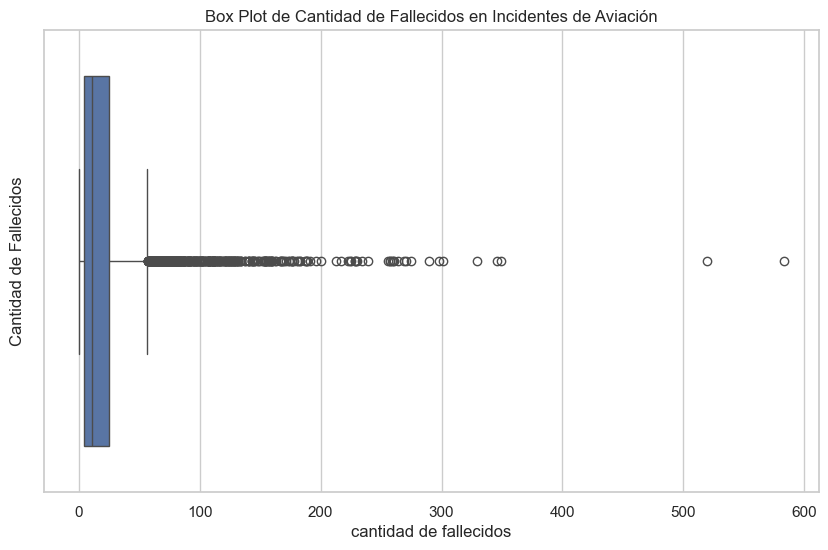

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

# Configura el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Filtra los datos para incluir solo valores entre 0 y 20 en 'cantidad de fallecidos'
filtered_df = df_hechos[(df_hechos['cantidad de fallecidos'] >= 0) & (df_hechos['cantidad de fallecidos'] <= 1000)]

# Crea un box plot para 'cantidad de fallecidos' en el rango de 0 a 20
plt.figure(figsize=(10, 6))  # Opcional: ajusta el tamaño del gráfico
sns.boxplot(x='cantidad de fallecidos', data=filtered_df)

# Agrega un título y etiquetas
plt.title('Box Plot de Cantidad de Fallecidos en Incidentes de Aviación')
plt.ylabel('Cantidad de Fallecidos')

# Muestra el gráfico
plt.show()

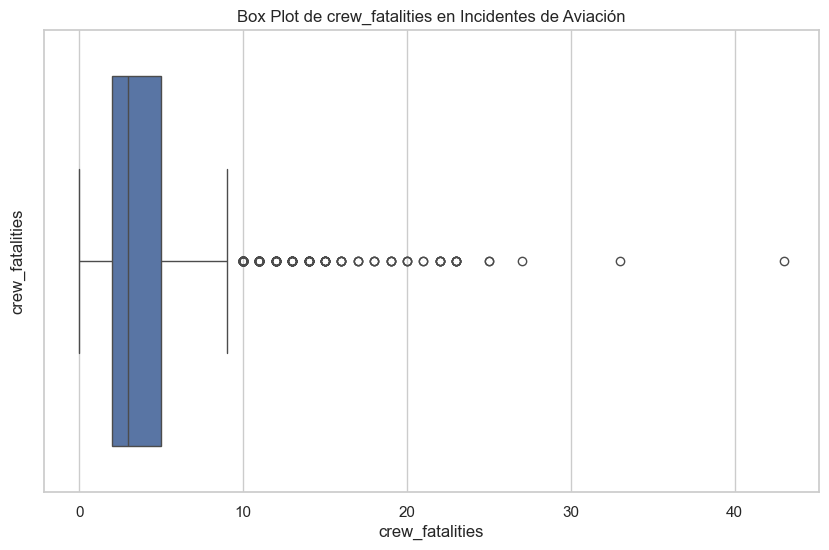

In [53]:
# Configura el estilo del gráfico (opcional)
sns.set(style="whitegrid")

# Filtra los datos para incluir solo valores entre 0 y 20 en 'cantidad de fallecidos'
filtered_df = df_hechos[(df_hechos['crew_fatalities'] >= 0) & (df_hechos['crew_fatalities'] <= 500)]

# Crea un box plot para 'cantidad de fallecidos' en el rango de 0 a 20
plt.figure(figsize=(10, 6))  # Opcional: ajusta el tamaño del gráfico
sns.boxplot(x='crew_fatalities', data=filtered_df)

# Agrega un título y etiquetas
plt.title('Box Plot de crew_fatalities en Incidentes de Aviación')
plt.ylabel('crew_fatalities')

# Muestra el gráfico
plt.show()

En estos graficos de bigotes podemos ver que como estan distribuidos los datos de las variables crew_fatalities y cantidad de fallecidos en el dataset 'accidentes' y las cuales son crusiales para nuestro analisis. En los graficos podemos ver que hay varios valores atipicos y muy lejos de la media en las variables analizadas. Teniendo en cuenta todo el procesamiento que se ha hecho a los datos podemos decir que en general todo el dataset tiene una calidad media la cual analizamos a continuacion.

# CALIDAD DE LOS DATOS

Características clave de la calidad de este conjunto de datos:

Exactitud y Precisión: Al parecer y guiendonos por las fuentes citadas en la propuesta del proyecto los datos han sido recopilados de fuentes oficiales y confiables, lo que garantiza la exactitud y la precisión de la información.

Completitud: El conjunto de datos contiene registros incompletos para algunos eventos por lo que se ha tratado de depurar lo mejor posible el dataset dejando los registros que presentan menos faltantes teniendo en cuenta no afectar demasiado el conjunto de datos.

Consistencia: Los datos siguen una estructura y un formato coherentes en todas las variables. Las categorías y los códigos utilizados son uniformes, lo que facilita la comparación y el análisis de diferentes aspectos.

Integridad y Seguridad: Los dataset se han implementado con las medidas medidas adecuadas de seguridad de datos para garantizar la integridad y la protección de la información de las victimas. Se han ocultado datos personales sensibles para preservar la privacidad.

Actualidad: Los datos contienen registros desde el año 1918 al año 2021 los que se podria tomar como datos historicos y medianamente actuales los cuales reflejan cercanamente la evolucion de los accidentes aereos. Esto permite un seguimiento de tendencias a lo largo del tiempo y la emision de conclusiones basada en buena cantidad de datos.

Relevancia: El conjunto de datos contiene una variedad de variables relevantes para el caso que nos interesa que son los accidentes aereos pero no solo se queda alli sino que estos datos tambien pueden ser aplicables a diferentes áreas de interés. Esto lo hace versátil y útil para una amplia gama de aplicaciones.

Documentación Detallada: No se proporciona documentación muy detallada que describa el origen de los datos, las definiciones de variables y las fuentes utilizadas. Lo que dificulta un poco la comprensión y el uso adecuado de los datos haciendo necesario un proceso de investigacion.

# ESTADISTICAS DESCRIPTIVAS

In [31]:
# Selecciona las columnas específicas para las estadísticas descriptivas
columnas_seleccionadas = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard',
       'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities',
       'ground', 'summary']

# Calcula estadísticas descriptivas solo para las columnas seleccionadas
estadisticas_descriptivas = df_hechos[columnas_seleccionadas].describe()

# Muestra las estadísticas descriptivas
print(estadisticas_descriptivas)

        all_aboard  PASAJEROS A BORDO  crew_aboard  cantidad de fallecidos  \
count  4553.000000        4551.000000  4553.000000             4554.000000   
mean     31.865803          27.378818     4.508456               22.723540   
std      46.923659          44.863203     3.552269               36.248832   
min       0.000000           0.000000     0.000000                0.000000   
25%       6.000000           3.000000     2.000000                4.000000   
50%      16.000000          12.000000     4.000000               11.000000   
75%      36.000000          31.000000     6.000000               25.000000   
max     644.000000         614.000000    61.000000              583.000000   

       passenger_fatalities  crew_fatalities       ground  
count           4552.000000      4554.000000  4535.000000  
mean              19.218585         3.583663     1.780375  
std               34.639905         3.164313    58.030674  
min                0.000000         0.000000     0.000000

# VISUALIZACIONES

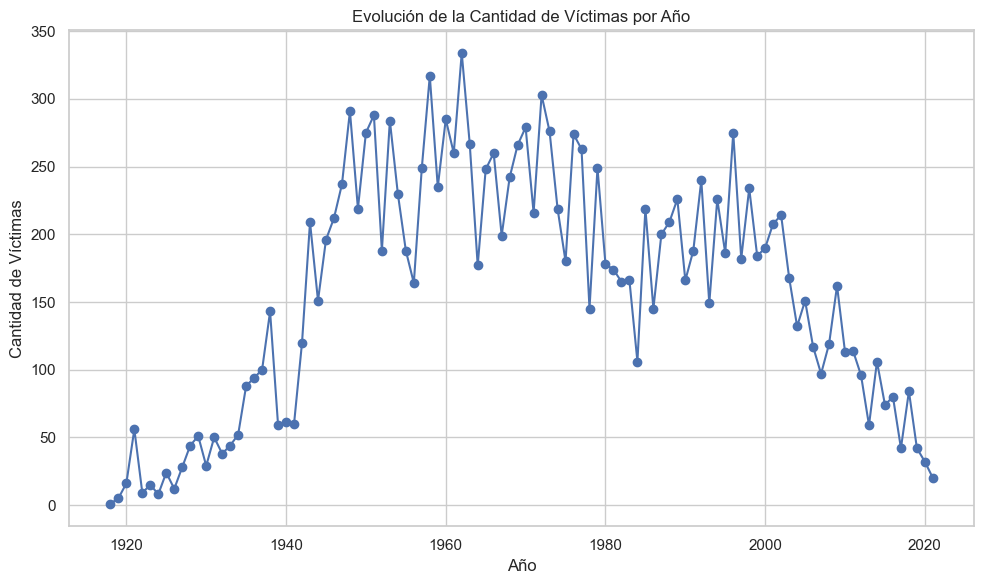

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupa los datos por año y suma la cantidad de víctimas en cada año
data_por_anio = df_hechos.groupby(df_hechos['fecha'].dt.year)['crew_fatalities'].sum()

# Crear el gráfico de línea
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(data_por_anio.index, data_por_anio.values, marker='o', linestyle='-')

# Configurar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Evolución de la Cantidad de Víctimas por Año')

# Mostrar el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.tight_layout()  # Ajustar diseño
plt.show()

En este Gráfico de Línea Temporal de accidentes podemos ver cómo la cantidad de crew_fatalities ha evolucionado a lo largo de los años. Es muy interesante observar que los años con mas accidentes estuvieron entre las decadas de los 50 y los 70 y de ahi en adelante la tendencia empezo a disminuir hasta el dia de hoy donde la cantidad de accidentes sigue contrayendose lo que hace notar que es un medio de transporte que cada vez es mas seguro

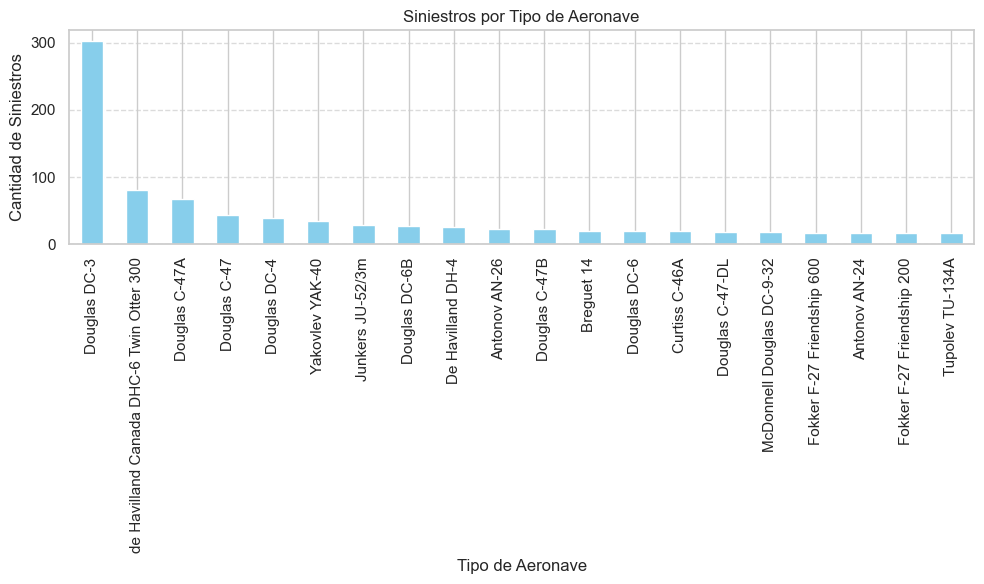

In [57]:

# Contar la cantidad de víctimas por tipo y seleccionar los 20 más representativos
victimas_por_tipo = df_hechos['ac_type'].value_counts().nlargest(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
victimas_por_tipo.plot(kind='bar', color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Cantidad de Siniestros')
plt.title('Siniestros por Tipo de Aeronave')

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar diseño
plt.show()

Este grafico nos muestra la cantidad de accidentes por tipo de aeronave; siendo el Douglas DC-3 la aeronave con mas siniestros relacionados desde el año 1918 al 2021. Tambien se observa que la cantidad de siniestros para los primeros 6 tipos es marcada.

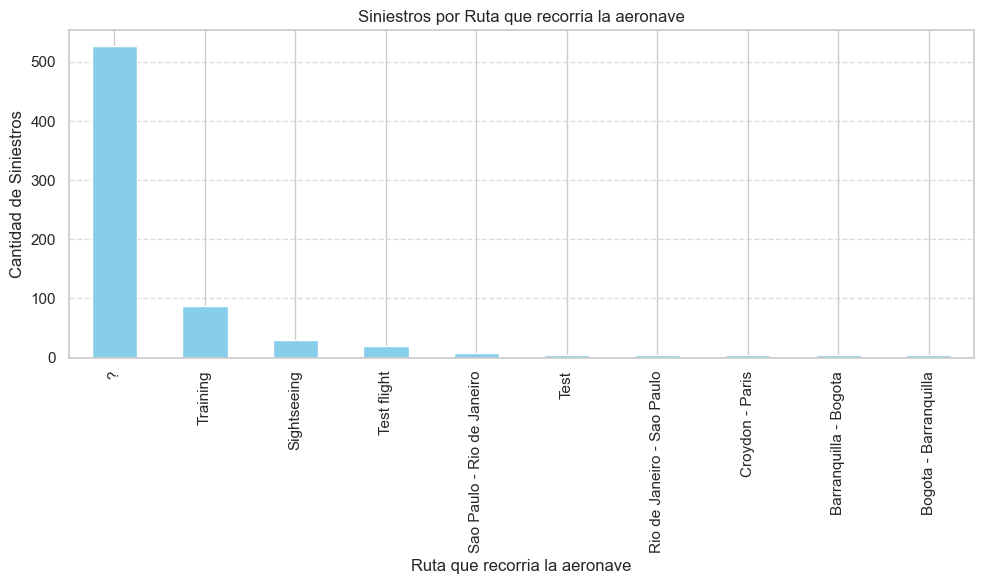

In [61]:
# Contar la cantidad de víctimas por tipo y seleccionar los 20 más representativos
victimas_por_tipo = df_hechos['route'].value_counts().nlargest(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
victimas_por_tipo.plot(kind='bar', color='skyblue')

# Configurar etiquetas y título
plt.xlabel('Ruta que recorria la aeronave')
plt.ylabel('Cantidad de Siniestros')
plt.title('Siniestros por Ruta que recorria la aeronave')

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajustar diseño
plt.show()

Aqui vemos que indudablemente las las rutas en donde se registran la mayor cantidad de siniestros es la de Sao Pablo - Rio de Janeiro, y aunque hay un gran numero de accidentes de los que se desconoce la ruta es curioso ver que los vuelos de entrenamiento y prueba resultan siendo los que mayor cantidad de accidentes registran.

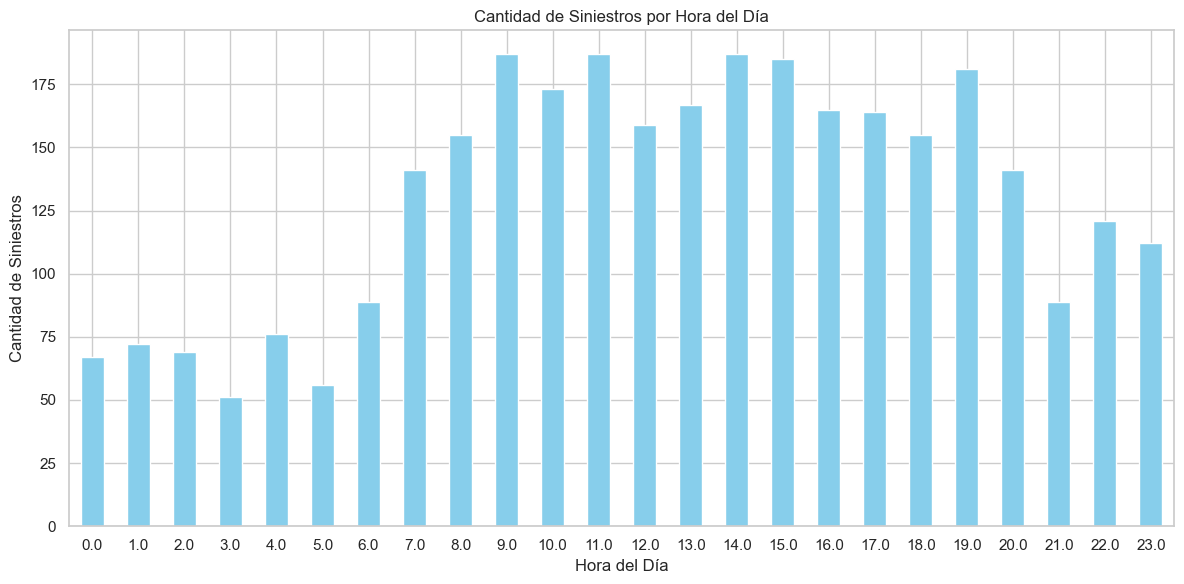

In [35]:
# Convierte la columna 'HORA declarada' en objetos DateTime
df_hechos['HORA declarada'] = pd.to_datetime(df_hechos['HORA declarada'], format='%H:%M:%S', errors='coerce')

# Define la función para extraer la hora de un objeto DateTime
def obtener_hora(registro):
    if not pd.isnull(registro):
        return registro.hour
    else:
        return None  # o cualquier otro valor que desees para los valores no válidos

# Aplicar la función para obtener la hora
df_hechos['HORA'] = df_hechos['HORA declarada'].apply(obtener_hora)

# Cuenta la cantidad de siniestros por hora
siniestros_por_hora = df_hechos['HORA'].value_counts().sort_index()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
siniestros_por_hora.plot(kind='bar', color='skyblue')

# Configura etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Siniestros')
plt.title('Cantidad de Siniestros por Hora del Día')

# Muestra el gráfico
plt.xticks(rotation=0)  # Mantener las etiquetas en posición vertical
plt.tight_layout()
plt.show()

Es interesante notar que los tipos de vehiculo acusados de causar el siniestro son los autos, pasajeros y cargas pero no son los que mayor cantidad de victimas reportan; siendo la mayor cantidad de victimas personas que van en moto o son peatones y en una parte menor las que van en autos.

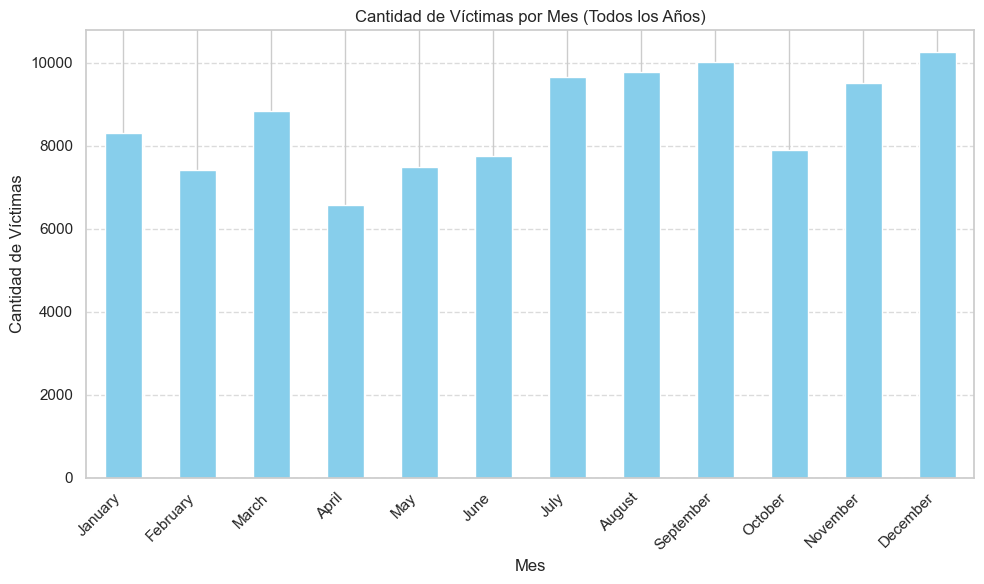

In [46]:
# Agrupa los datos por mes y suma la cantidad de víctimas en cada mes
data_por_mes = df_hechos.groupby(df_hechos['fecha'].dt.strftime('%B'))['cantidad de fallecidos'].sum()

# Ordena los meses cronológicamente
meses_ordenados = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data_por_mes = data_por_mes.reindex(meses_ordenados)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
data_por_mes.plot(kind='bar', color='skyblue')

# Configura etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Mes (Todos los Años)')

# Muestra el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajustar diseño
plt.show()

Es interesante ver aqui como hay una distribucion que aunque no es marcada muy fuertemente, es notable como ciertos meses del año tieden a presentar mas accidentados que otros. Se puede decir que durante el año hay dos tendencias alcistas una comienza de april a septiembre y la otra de octubre a diciembre posicionandose este ultimo como el mes donde mas accidentes se presentan; esto se puede explicar por las festividades de fin de año pero sigue siendo muy curioso que este comportamiento se repite año tras año y tambien  se produce un pico en el mes de septiembre que concuerda con el verano pero al siguiente mes vuelve a uno de los valores mas bajo del año y vuelve y comienza el ciclo.

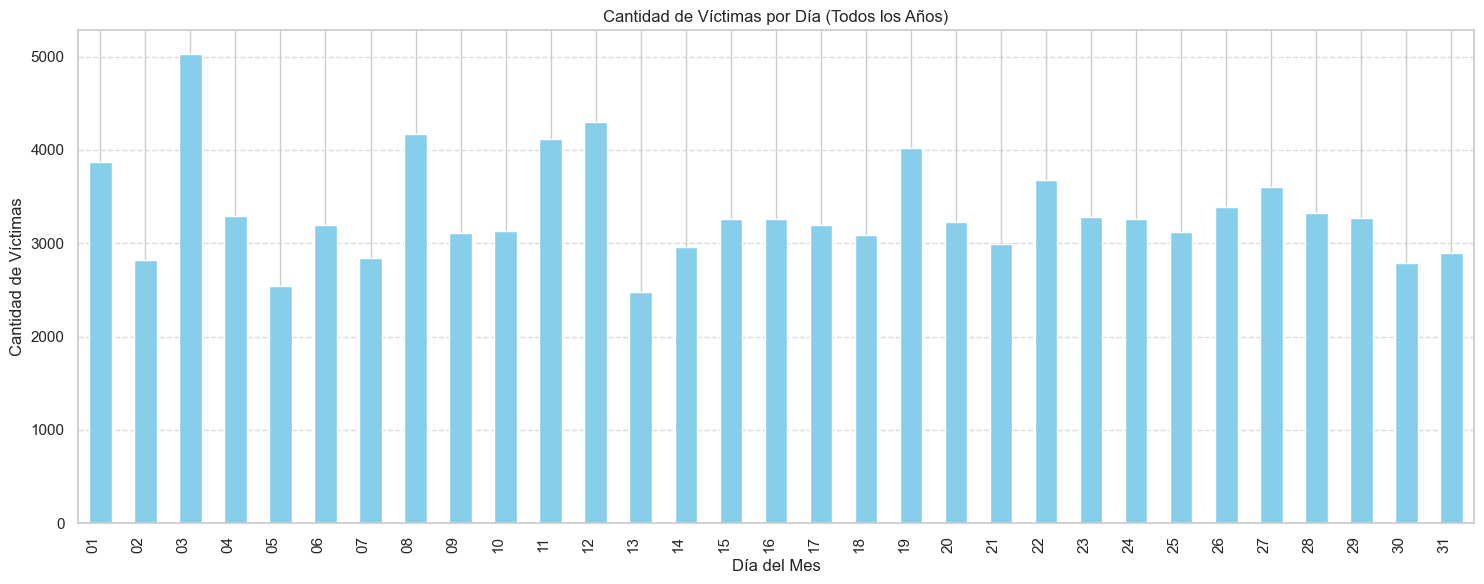

In [48]:
# Agrupa los datos por día y suma la cantidad de víctimas en cada día
data_por_dia = df_hechos.groupby(df_hechos['fecha'].dt.strftime('%d'))['cantidad de fallecidos'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(15, 6))  # Tamaño del gráfico
data_por_dia.plot(kind='bar', color='skyblue')

# Configura etiquetas y título
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad de Víctimas')
plt.title('Cantidad de Víctimas por Día (Todos los Años)')

# Muestra el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()  # Ajustar diseño
plt.show()

El patron que encuentro aqui es interesante si lo observamos teniendo en cuenta que hacia el final del mes en los ultimos 5 dias disminuyen drasticamente los siniestros alcanzando uno de los valores mas bajos del mes pero inmediatamente despues del ultimo dia del mes comienza hay un salto y en tres dias se alcanza el valor mas alto de todo el mes y despues de esto una disminucion drastica en donde el dia 5 es el mas seguro. Se puede decir que durante el mes la tendencia se mantiene pero definitivamente hay dias que tienen cierta tendencia alcista. 

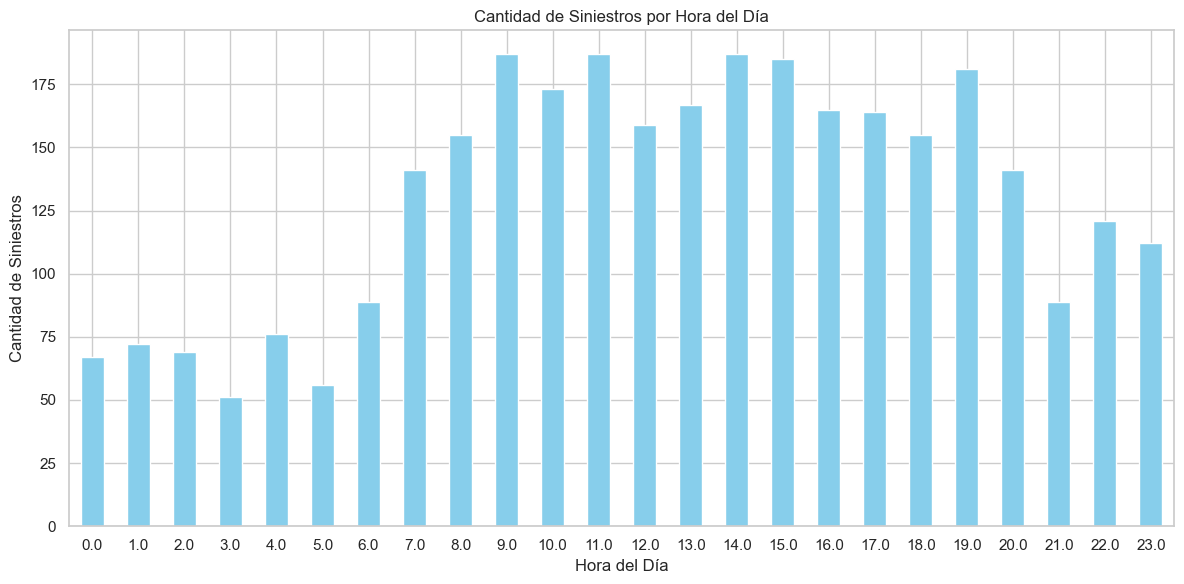

In [45]:
# Convierte la columna 'HORA declarada' en objetos DateTime
df_hechos['HORA declarada'] = pd.to_datetime(df_hechos['HORA declarada'], format='%H:%M:%S', errors='coerce')

# Define la función para extraer la hora de un objeto DateTime
def obtener_hora(registro):
    if not pd.isnull(registro):
        return registro.hour
    else:
        return None  # o cualquier otro valor que desees para los valores no válidos

# Aplicar la función para obtener la hora
df_hechos['HORA'] = df_hechos['HORA declarada'].apply(obtener_hora)

# Cuenta la cantidad de siniestros por hora
siniestros_por_hora = df_hechos['HORA'].value_counts().sort_index()

# Crea el gráfico de barras
plt.figure(figsize=(12, 6))
siniestros_por_hora.plot(kind='bar', color='skyblue')

# Configura etiquetas y título
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Siniestros')
plt.title('Cantidad de Siniestros por Hora del Día')

# Muestra el gráfico
plt.xticks(rotation=0)  # Mantener las etiquetas en posición vertical
plt.tight_layout()
plt.show()

Aqui podemos ver que hay una ciclo que comienza con las primeras horas de la mañana desde las 6 y finaliza sobre las 23 para despues tener un decenso a las 0 y el resto de las horas de la madrugada donde se presentan las menores cifras del dia y luego el comportamiento nuevamente recupera su fuerza y comienza el ciclo nuevamente.

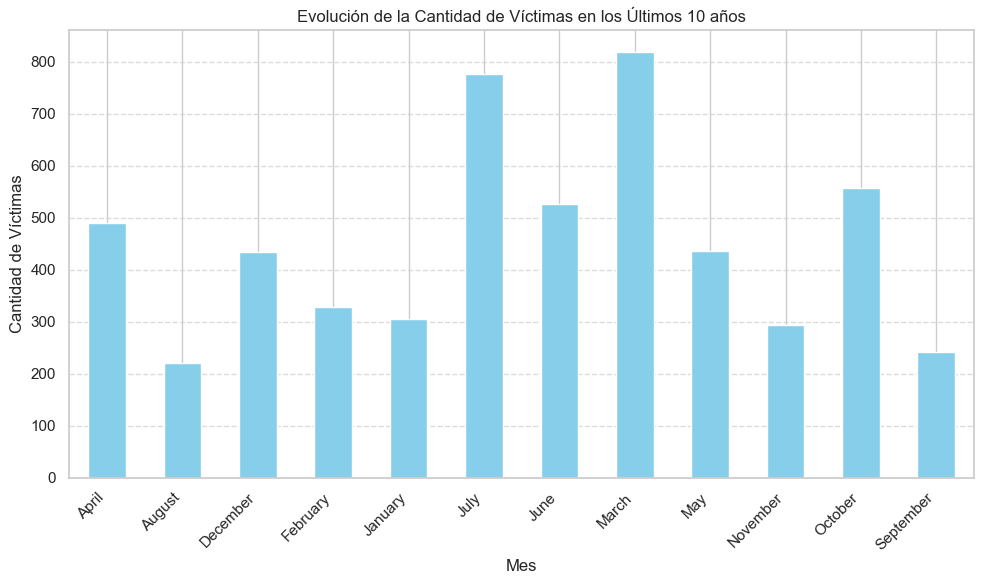

In [60]:
# Obtén la fecha actual
fecha_actual = df_hechos['fecha'].max()

# Calcula la fecha hace 120 meses
fecha_seis_meses_atras = fecha_actual - pd.DateOffset(months=120)

# Filtra las filas correspondientes a los últimos 6 meses
df_ultimos_seis_meses = df_hechos[(df_hechos['fecha'] >= fecha_seis_meses_atras) & (df_hechos['fecha'] <= fecha_actual)]

# Agrupa los datos por mes y suma la cantidad de víctimas en cada mes
data_por_mes = df_ultimos_seis_meses.groupby(df_ultimos_seis_meses['fecha'].dt.strftime('%B'))['cantidad de fallecidos'].sum()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
data_por_mes.plot(kind='bar', color='skyblue')

# Configura etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Cantidad de Víctimas')
plt.title(f'Evolución de la Cantidad de Víctimas en los Últimos 10 años')

# Muestra el gráfico
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajustar diseño
plt.show()

En este grafico de los ultimos 10 años podemos corroborar el comportamiento de la tendencia para ciertos meses que habiamos observado en le grafico de siniestros por mes para todos los años disponibles en nuestro dataset. Aqui vemos igual que en aquel grafico que definitivamente hay meses con mas siniestros que otros y este grafico nos muestra que son los meses de julio marzo y octubre los meses mas representativos.

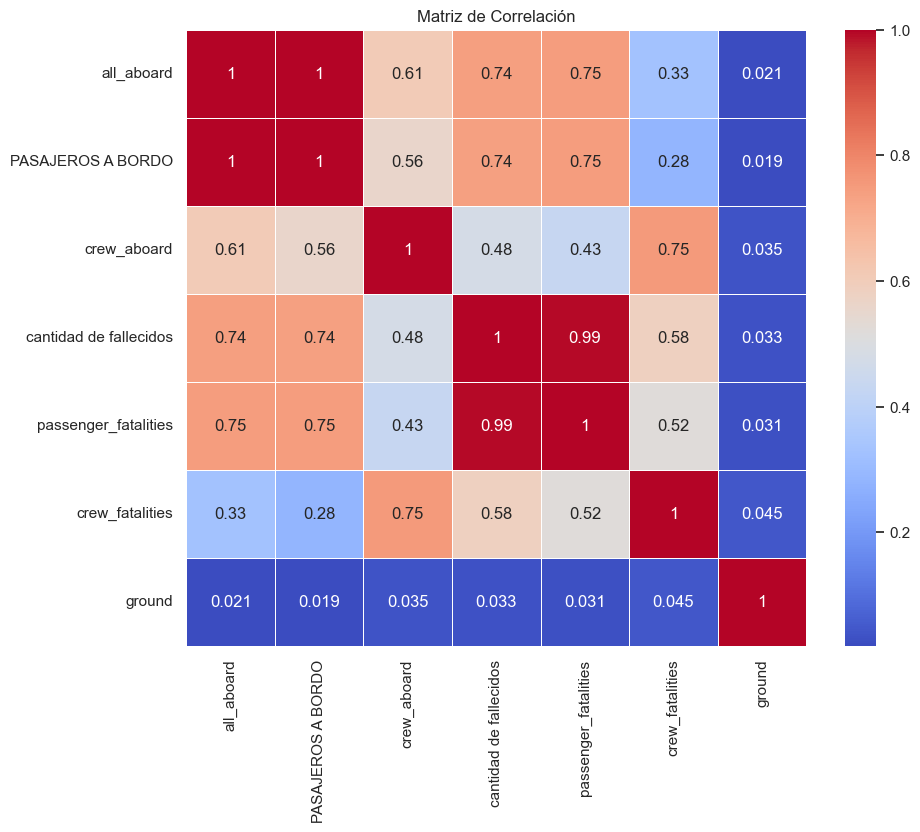

In [62]:
# Selecciona las columnas numéricas relevantes
num_columns = ['all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 
               'passenger_fatalities', 'crew_fatalities', 'ground']

# Calcula la matriz de correlación
correlation_matrix = df_hechos[num_columns].corr()

# Crea un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

En esta matriz de correlacion podemos observar la fuerte dependencia entre la cantidad total de fallecidos y el numero de pasajeros fallecidos, asi como tambien la dependencia entre la cantidad de personas a bordo y el numero total de pasajeros a bordo.


# Conclusiones del Análisis Exploratorio de Datos (EDA)

En este análisis exploratorio de datos, hemos examinado detalladamente el dataset Accidentes Aereos proporcionados por para realizar el proyecto. El objetivo de este EDA era comprender mejor la estructura y las características de los datos, así como identificar patrones y tendencias importantes. A continuación, se resumen las principales conclusiones y hallazgos obtenidos:

## Resumen General del Conjunto de Datos

El conjunto de datos contiene un total de 5008 registros de los cuales finalmete se utilizaron 4554 registros y 16 variables.
Las variables incluidas en el conjunto de datos son:
- Columnas de df_hechos: 'fecha', 'HORA declarada', 'Ruta', 'OperadOR', 'flight_no', 'route', 'ac_type', 'registration', 'all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities' 'crew_fatalities', 'ground', 'summary'
Desde el principio se analizaron solo las variables que presentaban algun potencial que pudiera contribuir con el objetivo final de el proyecto que analizar la evolucion de los sinientros aereos.


## Estadísticas Descriptivas

Se calcularon estadísticas descriptivas, como la media, la mediana, la desviación estándar y los percentiles, para las variables numéricas clave. Algunos de los hallazgos clave incluyen:
- Las estadisticas descriptivas que se obtuvieron de las dos variable importantes para este analisis en los dos dataset que son crew_aboard y cantidad de fallecidos nos muestran que el 75% de los accidentes involucran hasta 5 tripulantes como victimas fatales y que el promedio de victimas fatales por cada siniestro aereo es de 22 lo que nos indica que las tripulaciones representan un numero considerable de victimas en los accidentes aereos.


## Visualizaciones

Se crearon varias visualizaciones para explorar las relaciones y patrones en los datos. Algunos de los hallazgos visuales más destacados incluyen:
- La cantidad de victimas fatales hacia los ultimos meses del año entra una tendencia de aumento dos veces al año de abril a septiembre y de octubre a diciembre.
- Durante las diferentes horas del dia tambien se encuentran patrones de ocurrencia siendo la franja de tiempo que va desde las 5 a las 23 horas la que presenta mayor accidentalidad y en las horas de la mañana hay una caida drastica; comenzando desde las 0 hasta las 4 horas y luego nuevamente comienza el ciclo a las 5 horas. 


## Correlaciones

En esta matriz de correlacion podemos observar la fuerte dependencia entre la cantidad total de fallecidos y el numero de pasajeros fallecidos, asi como tambien la dependencia entre la cantidad de personas a bordo y el numero total de pasajeros a bordo.


## Conclusiones Generales

A medida que continuamos con el análisis y la interpretación de estos datos, es importante recordar que el EDA es un proceso iterativo y que se pueden realizar análisis más detallados en el futuro.

Existe una evidente correlacion entre el mes del año y la hora del en el resultado de un siniestro faltal pero cada una una de estas variables se analiza por separado para tratar de entender su comportamiento y la forma en que se puede relacionar con otras variables.

Este análisis exploratorio de datos proporciona una sólida comprensión de los dataset accidentes aereos que se pone a disposicion para realizar el proyecto. Despues de realizar una inspeccion detallada se puede entender claramente como se compone el dataset y como interpretarlo lo que ayuda mucho para lograr el objetivo de este proyecto. Asi mismo debemos considerar que este mismo dataset nos puede servir como base para futuros análisis y toma de decisiones relacionados con estos datos.

